<a href="https://colab.research.google.com/github/greyhound101/segmentation/blob/master/segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive
Mounted at /content/gdrive


In [ ]:
pip install tensorflow==1.13.1 

     |████████████████████████████████| 92.5MB 33kB/s 
     |████████████████████████████████| 368kB 63.7MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
     |████████████████████████████████| 3.2MB 56.3MB/s 
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


In [ ]:
pip install keras==2.2.4

     |████████████████████████████████| 317kB 9.3MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [ ]:
import zipfile
with zipfile.ZipFile('/content/gdrive/My Drive/segmentation/Training_Batch1.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [ ]:
pip install medpy

     |████████████████████████████████| 153kB 7.0MB/s 
     |████████████████████████████████| 47.4MB 67kB/s 
  Created wheel for medpy: filename=MedPy-0.4.0-cp36-cp36m-linux_x86_64.whl size=753435 sha256=76f0cbbad49a5027ea22edeb5ef888e5ba031b335d7522422b7ff5e90284c1e7
  Stored in directory: /root/.cache/pip/wheels/8c/c9/9c/2c6281c7a72b9fb1570862a4f028af7ce38405008354fbf870
Successfully built medpy


In [ ]:
from medpy.io import load, save
import os
import os.path
import numpy as np
def proprecessing(image_path, save_folder):

    if not os.path.exists("data/"+save_folder):
        os.mkdir("/content/data/"+save_folder)
    filelist = os.listdir(image_path)
    # filelist = [item for item in filelist if 'volume' in item]
    for file in filelist:
      if 'volume' in file:
        img, img_header = load(image_path+file)
        os.remove(image_path+file)
        img[img < -200] = -200
        img[img > 250] = 250
        img = np.array(img, dtype='float32')
        print ("Saving image "+file)
        save(img, "./data/" + save_folder + file)



def generate_livertxt(image_path, save_folder):
    if not os.path.exists("data/"+save_folder):
        os.mkdir("/content/data/"+save_folder)

    # Generate Livertxt
    if not os.path.exists("data/"+save_folder+'LiverPixels'):
        os.mkdir("/content/data/"+save_folder+'LiverPixels')

    for i in range(0,28):
        livertumor, header = load(image_path+'segmentation-'+str(i)+'.nii')
        f = open('/content/data/' +save_folder+'/LiverPixels/liver_' + str(i) + '.txt', 'w')
        index = np.where(livertumor==1)
        print(i)
        x = index[0]
        y = index[1]
        z = index[2]
        np.savetxt(f, np.c_[x,y,z], fmt="%d")
	
        f.write("\n")
        f.close()

def generate_tumortxt(image_path, save_folder):
    if not os.path.exists("data/"+save_folder):
        os.mkdir("/content/data/"+save_folder)

    # Generate Livertxt
    if not os.path.exists("/content/data/"+save_folder+'TumorPixels'):
        os.mkdir("/content/data/"+save_folder+'TumorPixels')

    for i in range(0,28):
        livertumor, header = load(image_path+'segmentation-'+str(i)+'.nii')
        f = open("/content/data/"+save_folder+"/TumorPixels/tumor_"+str(i)+'.txt','w')
        index = np.where(livertumor==2)
        print(i)
        x = index[0]
        y = index[1]
        z = index[2]

        np.savetxt(f,np.c_[x,y,z],fmt="%d")

        f.write("\n")
        f.close()
def generate_txt(image_path, save_folder):
    if not os.path.exists("/content/data/"+save_folder):
        os.mkdir("/content/data/"+save_folder)

    # Generate Livertxt
    if not os.path.exists("/content/data/"+save_folder+'LiverBox'):
        os.mkdir("/content/data/"+save_folder+'LiverBox')
    for i in range(0,28):
        print(i)
        values = np.loadtxt('/content/data/myTrainingDataTxt/LiverPixels/liver_' + str(i) + '.txt', delimiter=' ', usecols=[0, 1, 2])
        a = np.min(values, axis=0)
        b = np.max(values, axis=0)
        box = np.append(a,b, axis=0)
        np.savetxt('/content/data/myTrainingDataTxt/LiverBox/box_'+str(i)+'.txt', box,fmt='%d')

In [ ]:
proprecessing(image_path='/content/media/nas/01_Datasets/CT/LITS/Training Batch 1/', save_folder='myTrainingData/')
# proprecessing(image_path='data/TestData/', save_folder='myTestData/')
print ("Generate liver txt ")
generate_livertxt(image_path='/content/media/nas/01_Datasets/CT/LITS/Training Batch 1/', save_folder='myTrainingDataTxt/')
print ("Generate tumor txt")
generate_tumortxt(image_path='/content/media/nas/01_Datasets/CT/LITS/Training Batch 1/', save_folder='myTrainingDataTxt/')
print ("Generate liver box ")
generate_txt(image_path='/content/media/nas/01_Datasets/CT/LITS/Training Batch 1/', save_folder='myTrainingDataTxt/')

Saving image volume-7.nii
Saving image volume-20.nii
Saving image volume-6.nii
Saving image volume-22.nii
Saving image volume-3.nii
Saving image volume-5.nii
Saving image volume-18.nii
Saving image volume-1.nii
Saving image volume-14.nii
Saving image volume-27.nii
Saving image volume-17.nii
Saving image volume-15.nii
Saving image volume-13.nii
Saving image volume-24.nii
Saving image volume-11.nii
Saving image volume-8.nii
Saving image volume-9.nii
Saving image volume-23.nii
Saving image volume-21.nii
Saving image volume-25.nii
Saving image volume-26.nii
Saving image volume-19.nii
Saving image volume-4.nii
Saving image volume-16.nii
Saving image volume-10.nii
Saving image volume-2.nii
Saving image volume-0.nii
Saving image volume-12.nii


FileNotFoundError: ignored

In [ ]:
from __future__ import print_function
import sys
sys.path.insert(0,'/home/xmli/livertumor_xmli/Keras-2.0.8')
sys.path.insert(0,'/home/xmli/livertumor_xmli/mylib')
# sys.path.insert(0,'/research/pheng/xmli/livertumor/Keras-2.0.8')
# sys.path.insert(0,'/research/pheng/xmli/livertumor/mylib')
from multiprocessing.dummy import Pool as ThreadPool
import random
from medpy.io import load
import numpy as np
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, ZeroPadding2D, concatenate, add
from keras.layers.core import Dropout, Activation
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.layers.pooling import AveragePooling2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import keras.backend as K
import os
import time
from skimage.transform import resize

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

In [ ]:
import sys
sys.path.insert(0,'Keras-2.0.8')
from keras.engine import Layer, InputSpec
try:
    from keras import initializations
except ImportError:
    from keras import initializers as initializations
import keras.backend as K

class Scale(Layer):
    '''Custom Layer for DenseNet used for BatchNormalization.
    
    Learns a set of weights and biases used for scaling the input data.
    the output consists simply in an element-wise multiplication of the input
    and a sum of a set of constants:
        out = in * gamma + beta,
    where 'gamma' and 'beta' are the weights and biases larned.
    # Arguments
        axis: integer, axis along which to normalize in mode 0. For instance,
            if your input tensor has shape (samples, channels, rows, cols),
            set axis to 1 to normalize per feature map (channels axis).
        momentum: momentum in the computation of the
            exponential average of the mean and standard deviation
            of the data, for feature-wise normalization.
        weights: Initialization weights.
            List of 2 Numpy arrays, with shapes:
            `[(input_shape,), (input_shape,)]`
        beta_init: name of initialization function for shift parameter
            (see [initializations](../initializations.md)), or alternatively,
            Theano/TensorFlow function to use for weights initialization.
            This parameter is only relevant if you don't pass a `weights` argument.
        gamma_init: name of initialization function for scale parameter (see
            [initializations](../initializations.md)), or alternatively,
            Theano/TensorFlow function to use for weights initialization.
            This parameter is only relevant if you don't pass a `weights` argument.
    '''
    def __init__(self, weights=None, axis=-1, momentum = 0.9, beta_init='zero', gamma_init='one', **kwargs):
        self.momentum = momentum
        self.axis = axis
        self.beta_init = initializations.get(beta_init)
        self.gamma_init = initializations.get(gamma_init)
        self.initial_weights = weights
        super(Scale, self).__init__(**kwargs)

    def build(self, input_shape):
        self.input_spec = [InputSpec(shape=input_shape)]
        shape = (int(input_shape[self.axis]),)

        # Tensorflow >= 1.0.0 compatibility
        self.gamma = K.variable(self.gamma_init(shape), name='{}_gamma'.format(self.name))
        self.beta = K.variable(self.beta_init(shape), name='{}_beta'.format(self.name))
        #self.gamma = self.gamma_init(shape, name='{}_gamma'.format(self.name))
        #self.beta = self.beta_init(shape, name='{}_beta'.format(self.name))
        self.trainable_weights = [self.gamma, self.beta]

        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights

    def call(self, x, mask=None):
        input_shape = self.input_spec[0].shape
        broadcast_shape = [1] * len(input_shape)
        broadcast_shape[self.axis] = input_shape[self.axis]

        out = K.reshape(self.gamma, broadcast_shape) * x + K.reshape(self.beta, broadcast_shape)
        return out

    def get_config(self):
        config = {"momentum": self.momentum, "axis": self.axis}
        base_config = super(Scale, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [ ]:
import sys
sys.path.insert(0,'Keras-2.0.8')
from keras.engine import Layer, InputSpec
try:
    from keras import initializations
except ImportError:
    from keras import initializers as initializations
import keras.backend as K

class Scale(Layer):
    '''Custom Layer for DenseNet used for BatchNormalization.
    
    Learns a set of weights and biases used for scaling the input data.
    the output consists simply in an element-wise multiplication of the input
    and a sum of a set of constants:
        out = in * gamma + beta,
    where 'gamma' and 'beta' are the weights and biases larned.
    # Arguments
        axis: integer, axis along which to normalize in mode 0. For instance,
            if your input tensor has shape (samples, channels, rows, cols),
            set axis to 1 to normalize per feature map (channels axis).
        momentum: momentum in the computation of the
            exponential average of the mean and standard deviation
            of the data, for feature-wise normalization.
        weights: Initialization weights.
            List of 2 Numpy arrays, with shapes:
            `[(input_shape,), (input_shape,)]`
        beta_init: name of initialization function for shift parameter
            (see [initializations](../initializations.md)), or alternatively,
            Theano/TensorFlow function to use for weights initialization.
            This parameter is only relevant if you don't pass a `weights` argument.
        gamma_init: name of initialization function for scale parameter (see
            [initializations](../initializations.md)), or alternatively,
            Theano/TensorFlow function to use for weights initialization.
            This parameter is only relevant if you don't pass a `weights` argument.
    '''
    def __init__(self, weights=None, axis=-1, momentum = 0.9, beta_init='zero', gamma_init='one', **kwargs):
        self.momentum = momentum
        self.axis = axis
        self.beta_init = initializations.get(beta_init)
        self.gamma_init = initializations.get(gamma_init)
        self.initial_weights = weights
        super(Scale, self).__init__(**kwargs)

    def build(self, input_shape):
        self.input_spec = [InputSpec(shape=input_shape)]
        shape = (int(input_shape[self.axis]),)

        # Tensorflow >= 1.0.0 compatibility
        self.gamma = K.variable(self.gamma_init(shape), name='{}_gamma'.format(self.name))
        self.beta = K.variable(self.beta_init(shape), name='{}_beta'.format(self.name))
        #self.gamma = self.gamma_init(shape, name='{}_gamma'.format(self.name))
        #self.beta = self.beta_init(shape, name='{}_beta'.format(self.name))
        self.trainable_weights = [self.gamma, self.beta]

        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights

    def call(self, x, mask=None):
        input_shape = self.input_spec[0].shape
        broadcast_shape = [1] * len(input_shape)
        broadcast_shape[self.axis] = input_shape[self.axis]

        out = K.reshape(self.gamma, broadcast_shape) * x + K.reshape(self.beta, broadcast_shape)
        return out

    def get_config(self):
        config = {"momentum": self.momentum, "axis": self.axis}
        base_config = super(Scale, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [ ]:
import glob
for path in glob.glob('/content/media/nas/01_Datasets/CT/LITS/Training Batch 1/*'):
  os.remove(path)

In [ ]:
from __future__ import print_function
import sys
sys.path.insert(0,'/home/xmli/livertumor_xmli/Keras-2.0.8')
sys.path.insert(0,'/home/xmli/livertumor_xmli/mylib')
# sys.path.insert(0,'/research/pheng/xmli/livertumor/Keras-2.0.8')
# sys.path.insert(0,'/research/pheng/xmli/livertumor/mylib')
from multiprocessing.dummy import Pool as ThreadPool
import random
from tqdm import tqdm
from medpy.io import load
import numpy as np
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, ZeroPadding2D, concatenate, add
from keras.layers.core import Dropout, Activation
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.layers.pooling import AveragePooling2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import keras.backend as K
import os
import time
from skimage.transform import resize
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
K.set_image_dim_ordering('tf')

path = '/content/gdrive/My Drive/segmentation/'
batch_size = 1
img_deps = 512
img_rows = 512
img_cols = 3
std = 37
thread_num = 14
txtfile = 'myTrainingDataTxt'
mean = 48

liverlist = [32,34,38,41,47,87,89,91,105,106,114,115,119]
DataList = ["/content/data/"]
def load_seq_crop_data_masktumor_try(Parameter_List):
    img = Parameter_List[0]
    tumor = Parameter_List[1]
    lines = Parameter_List[2]
    numid = Parameter_List[3]
    minindex = Parameter_List[4]
    maxindex = Parameter_List[5]
    #  randomly scale
    scale = np.random.uniform(0.8,1.2)
    deps = int(img_deps * scale)
    rows = int(img_rows * scale)
    cols = 3
    
    
    
    sed = np.random.randint(1,numid)
    cen = lines[sed-1]
    cen = np.fromstring(cen, dtype=int, sep=' ')
    # print (cen)
    a = min(max(minindex[0] + deps/2, cen[0]), maxindex[0]- deps/2-1)
    b = min(max(minindex[1] + rows/2, cen[1]), maxindex[1]- rows/2-1)
    c = min(max(minindex[2] + cols/2, cen[2]), maxindex[2]- cols/2-1)
    
    a1=min(img.shape[0]-int(a - deps / 2),int(a + (deps / 2)))
    a2=max(img.shape[0]-int(a - deps / 2),int(a + (deps / 2)))
    b1=min(img.shape[1]-int(b - (rows / 2)),int(b + (rows / 2)))
    b2=max(img.shape[1]-int(b - (rows / 2)),int(b + (rows / 2)))
    c1=min(img.shape[2]-int(c - (cols / 2)),int(c + (cols / 2)))
    c2=max(img.shape[2]-int(c - (cols / 2)),int(c + (cols / 2)))
    
    
    # cropp_img = img[int(a - (deps / 2)):int(a + (deps / 2)), int(b - (rows / 2)):int(b + (rows / 2)),
    #             int(c - (cols / 2)): int(c + (cols / 2) + 1)].copy()
    # cropp_tumor = tumor[int(a -( deps / 2)):int(a + (deps / 2)), int(b - (rows / 2)):int(b + (rows / 2)),
    #               int(c - (cols / 2)):int(c + (cols / 2) + 1)].copy()
    
    cropp_img = img[a1:a2, b1:b2,c1: c2+1].copy()

    cropp_tumor = tumor[a1:a2, b1:b2,c1: c2+1].copy()
    
    if cropp_tumor.shape[0]==0 or cropp_img.shape[0]==0:
      print(img.shape)
      print(int(a - (deps / 2)),int(a + (deps / 2)), int(b - (rows / 2)),int(b + (rows / 2)),
                int(c - (cols / 2)), int(c + (cols / 2) + 1))
    cropp_img -= mean
     # randomly flipping
    flip_num = np.random.randint(0,3)
    if flip_num == 1:
        cropp_img = np.flipud(cropp_img)
        cropp_tumor = np.flipud(cropp_tumor)
    elif flip_num == 2:
        cropp_img = np.fliplr(cropp_img)
        cropp_tumor = np.fliplr(cropp_tumor)
    #
    
     
    cropp_tumor = resize(cropp_tumor, (img_deps,img_rows,img_cols), order=0, mode='edge', cval=0, clip=True, preserve_range=True)
    cropp_img   = resize(cropp_img, (img_deps,img_rows,img_cols), order=3, mode='constant', cval=0, clip=True, preserve_range=True)
    return cropp_img, cropp_tumor[:,:,1]

def generate_arrays_from_file(batch_size, trainidx, img_list, tumor_list, tumorlines, liverlines, tumoridx, liveridx, minindex_list, maxindex_list):
    while 1:
        X = np.zeros((batch_size, img_deps, img_rows, img_cols), dtype='float32')
        Y = np.zeros((batch_size, img_deps, img_rows, 1), dtype='int16')
        Parameter_List = []
        for idx in range(batch_size):
            count = random.choice(trainidx)
            img = img_list[count]
            tumor = tumor_list[count]
            minindex = minindex_list[count]
            maxindex = maxindex_list[count]
            num = np.random.randint(0,6)
            if num < 3 or (count in liverlist):
                lines = liverlines[count]
                numid = liveridx[count]
            else:
                lines = tumorlines[count]
                numid = tumoridx[count]
            Parameter_List.append([img, tumor, lines, numid, minindex, maxindex])
        pool = ThreadPool(thread_num)
        result_list = pool.map(load_seq_crop_data_masktumor_try, Parameter_List)
        pool.close()
        pool.join()
        for idx in range(len(result_list)):
            X[idx, :, :, :] = result_list[idx][0]
            Y[idx, :, :, 0] = result_list[idx][1]
        yield (X,Y)

def weighted_crossentropy(y_true, y_pred):

    y_pred_f = K.reshape(y_pred, (batch_size*img_deps*img_rows,3))
    y_true_f = K.reshape(y_true, (batch_size*img_deps*img_rows,))

    soft_pred_f = K.softmax(y_pred_f)
    soft_pred_f = K.log(tf.clip_by_value(soft_pred_f, 1e-10, 1.0))

    neg = K.equal(y_true_f, K.zeros_like(y_true_f))
    neg_calculoss = tf.gather(soft_pred_f[:,0], tf.where(neg))

    pos1 = K.equal(y_true_f, K.ones_like(y_true_f))
    pos1_calculoss = tf.gather(soft_pred_f[:,1], tf.where(pos1))

    pos2 = K.equal(y_true_f, 2*K.ones_like(y_true_f))
    pos2_calculoss = tf.gather(soft_pred_f[:,2], tf.where(pos2))

    loss = -K.mean(tf.concat([0.78*neg_calculoss, 0.65*pos1_calculoss, 8.57*pos2_calculoss], 0))

    return loss


def DenseUNet(nb_dense_block=4, growth_rate=48, nb_filter=96, reduction=0.0, dropout_rate=0.0, weight_decay=1e-4, classes=1000, weights_path=None):
    '''Instantiate the DenseNet 161 architecture,
        # Arguments
            nb_dense_block: number of dense blocks to add to end
            growth_rate: number of filters to add per dense block
            nb_filter: initial number of filters
            reduction: reduction factor of transition blocks.
            dropout_rate: dropout rate
            weight_decay: weight decay factor
            classes: optional number of classes to classify images
            weights_path: path to pre-trained weights
        # Returns
            A Keras model instance.
    '''
    eps = 1.1e-5

    # compute compression factor
    compression = 1.0 - reduction

    # Handle Dimension Ordering for different backends
    global concat_axis
    if K.image_dim_ordering() == 'tf':
      concat_axis = 3
      img_input = Input(batch_shape=(batch_size, img_deps, img_rows, 3), name='data')
    else:
      concat_axis = 1
      img_input = Input(shape=(3, 224, 224), name='data')

    # From architecture for ImageNet (Table 1 in the paper)
    nb_filter = 96
    nb_layers = [6,12,36,24] # For DenseNet-161
    box = []
    # Initial convolution
    x = ZeroPadding2D((3, 3), name='conv1_zeropadding')(img_input)
    x = Conv2D(nb_filter, (7, 7), strides=(2, 2), name='conv1', use_bias=False)(x)
    x = BatchNormalization(epsilon=eps, axis=concat_axis, name='conv1_bn')(x)
    x = Scale(axis=concat_axis, name='conv1_scale')(x)
    x = Activation('relu', name='relu1')(x)
    box.append(x)
    x = ZeroPadding2D((1, 1), name='pool1_zeropadding')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), name='pool1')(x)

    # Add dense blocks
    for block_idx in range(nb_dense_block - 1):
        stage = block_idx+2
        x, nb_filter = dense_block(x, stage, nb_layers[block_idx], nb_filter, growth_rate, dropout_rate=dropout_rate, weight_decay=weight_decay)
        box.append(x)
        # Add transition_block
        x = transition_block(x, stage, nb_filter, compression=compression, dropout_rate=dropout_rate, weight_decay=weight_decay)
        nb_filter = int(nb_filter * compression)

    final_stage = stage + 1
    x, nb_filter = dense_block(x, final_stage, nb_layers[-1], nb_filter, growth_rate, dropout_rate=dropout_rate, weight_decay=weight_decay)

    x = BatchNormalization(epsilon=eps, axis=concat_axis, name='conv'+str(final_stage)+'_blk_bn')(x)
    x = Scale(axis=concat_axis, name='conv'+str(final_stage)+'_blk_scale')(x)
    x = Activation('relu', name='relu'+str(final_stage)+'_blk')(x)
    box.append(x)

    up0 = UpSampling2D(size=(2,2))(x)
    line0 = Conv2D(2208, (1, 1), padding="same", kernel_initializer="normal", name="line0")(box[3])
    up0_sum = add([line0, up0])
    conv_up0 = Conv2D(768, (3, 3), padding="same", kernel_initializer="normal", name = "conv_up0")(up0_sum)
    bn_up0 = BatchNormalization(name = "bn_up0")(conv_up0)
    ac_up0 = Activation('relu', name='ac_up0')(bn_up0)

    up1 = UpSampling2D(size=(2,2))(ac_up0)
    up1_sum = add([box[2], up1])
    conv_up1 = Conv2D(384, (3, 3), padding="same", kernel_initializer="normal", name = "conv_up1")(up1_sum)
    bn_up1 = BatchNormalization(name = "bn_up1")(conv_up1)
    ac_up1 = Activation('relu', name='ac_up1')(bn_up1)

    up2 = UpSampling2D(size=(2,2))(ac_up1)
    up2_sum = add([box[1], up2])
    conv_up2 = Conv2D(96, (3, 3), padding="same", kernel_initializer="normal", name = "conv_up2")(up2_sum)
    bn_up2 = BatchNormalization(name = "bn_up2")(conv_up2)
    ac_up2 = Activation('relu', name='ac_up2')(bn_up2)

    up3 = UpSampling2D(size=(2,2))(ac_up2)
    up3_sum = add([box[0], up3])
    conv_up3 = Conv2D(96, (3, 3), padding="same", kernel_initializer="normal", name = "conv_up3")(up3_sum)
    bn_up3 = BatchNormalization(name = "bn_up3")(conv_up3)
    ac_up3 = Activation('relu', name='ac_up3')(bn_up3)

    up4 = UpSampling2D(size=(2, 2))(ac_up3)
    conv_up4 = Conv2D(64, (3, 3), padding="same", kernel_initializer="normal", name="conv_up4")(up4)
    conv_up4 = Dropout(rate=0.3)(conv_up4)
    bn_up4 = BatchNormalization(name="bn_up4")(conv_up4)
    ac_up4 = Activation('relu', name='ac_up4')(bn_up4)

    x = Conv2D(3, (1,1), padding="same", kernel_initializer="normal", name="dense167classifer")(ac_up4)

    model = Model(img_input, x, name='denseu161')

    if weights_path is not None:
      model.load_weights(weights_path)

    return model

def conv_block(x, stage, branch, nb_filter, dropout_rate=None, weight_decay=1e-4):
    '''Apply BatchNorm, Relu, bottleneck 1x1 Conv2D, 3x3 Conv2D, and option dropout
        # Arguments
            x: input tensor 
            stage: index for dense block
            branch: layer index within each dense block
            nb_filter: number of filters
            dropout_rate: dropout rate
            weight_decay: weight decay factor
    '''
    eps = 1.1e-5
    conv_name_base = 'conv' + str(stage) + '_' + str(branch)
    relu_name_base = 'relu' + str(stage) + '_' + str(branch)

    # 1x1 Convolution (Bottleneck layer)
    inter_channel = nb_filter * 4
    x = BatchNormalization(epsilon=eps, axis=concat_axis, name=conv_name_base+'_x1_bn')(x)
    x = Scale(axis=concat_axis, name=conv_name_base+'_x1_scale')(x)
    x = Activation('relu', name=relu_name_base+'_x1')(x)
    x = Conv2D(inter_channel, (1, 1), name=conv_name_base+'_x1', use_bias=False)(x)

    if dropout_rate:
        x = Dropout(dropout_rate)(x)

    # 3x3 Convolution
    x = BatchNormalization(epsilon=eps, axis=concat_axis, name=conv_name_base+'_x2_bn')(x)
    x = Scale(axis=concat_axis, name=conv_name_base+'_x2_scale')(x)
    x = Activation('relu', name=relu_name_base+'_x2')(x)
    x = ZeroPadding2D((1, 1), name=conv_name_base+'_x2_zeropadding')(x)
    x = Conv2D(nb_filter, (3, 3), name=conv_name_base+'_x2', use_bias=False)(x)

    if dropout_rate:
        x = Dropout(dropout_rate)(x)

    return x


def transition_block(x, stage, nb_filter, compression=1.0, dropout_rate=None, weight_decay=1E-4):
    ''' Apply BatchNorm, 1x1 Convolution, averagePooling, optional compression, dropout 
        # Arguments
            x: input tensor
            stage: index for dense block
            nb_filter: number of filters
            compression: calculated as 1 - reduction. Reduces the number of feature maps in the transition block.
            dropout_rate: dropout rate
            weight_decay: weight decay factor
    '''

    eps = 1.1e-5
    conv_name_base = 'conv' + str(stage) + '_blk'
    relu_name_base = 'relu' + str(stage) + '_blk'
    pool_name_base = 'pool' + str(stage)

    x = BatchNormalization(epsilon=eps, axis=concat_axis, name=conv_name_base+'_bn')(x)
    x = Scale(axis=concat_axis, name=conv_name_base+'_scale')(x)
    x = Activation('relu', name=relu_name_base)(x)
    x = Conv2D(int(nb_filter * compression), (1, 1), name=conv_name_base, use_bias=False)(x)

    if dropout_rate:
        x = Dropout(dropout_rate)(x)

    x = AveragePooling2D((2, 2), strides=(2, 2), name=pool_name_base)(x)

    return x


def dense_block(x, stage, nb_layers, nb_filter, growth_rate, dropout_rate=None, weight_decay=1e-4, grow_nb_filters=True):
    ''' Build a dense_block where the output of each conv_block is fed to subsequent ones
        # Arguments
            x: input tensor
            stage: index for dense block
            nb_layers: the number of layers of conv_block to append to the model.
            nb_filter: number of filters
            growth_rate: growth rate
            dropout_rate: dropout rate
            weight_decay: weight decay factor
            grow_nb_filters: flag to decide to allow number of filters to grow
    '''

    eps = 1.1e-5
    concat_feat = x

    for i in range(nb_layers):
        branch = i+1
        x = conv_block(concat_feat, stage, branch, growth_rate, dropout_rate, weight_decay)
        concat_feat = concatenate([concat_feat, x], axis=concat_axis, name='concat_'+str(stage)+'_'+str(branch))

        if grow_nb_filters:
            nb_filter += growth_rate

    return concat_feat, nb_filter



def train_and_predict():

    print('-'*30)
    print('Creating and compiling model...')
    print('-'*30)

    model = DenseUNet(reduction=0.5, weights_path=None)
    sgd = SGD(lr=1e-3, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss=[weighted_crossentropy])

    trainidx = list(range(5))
    img_list = []
    tumor_list = []
    minindex_list = []
    maxindex_list = []
    tumorlines = []
    tumoridx = []
    liveridx = []
    liverlines = []
    t1=time.time()
    for idx in tqdm(range(5)):
        img, img_header = load(DataList[0] + 'myTrainingData/volume-' + str(idx) + '.nii' )
        tumor, tumor_header = load('/content/media/nas/01_Datasets/CT/LITS/Training Batch 1/segmentation-'+str(idx)+'.nii')
        img_list.append(img)
        tumor_list.append(tumor)

        maxmin = np.loadtxt(DataList[0] + str(txtfile) + '/LiverBox/box_' + str(idx) + '.txt', delimiter=' ')
        minindex = maxmin[0:3]
        maxindex = maxmin[3:6]
        minindex = np.array(minindex, dtype='int')
        maxindex = np.array(maxindex, dtype='int')
        minindex[0] = max(minindex[0]-3, 0)
        minindex[1] = max(minindex[1]-3, 0)
        minindex[2] = max(minindex[2]-3, 0)
        maxindex[0] = min(img.shape[0], maxindex[0]+3)
        maxindex[1] = min(img.shape[1], maxindex[1]+3)
        maxindex[2] = min(img.shape[2], maxindex[2]+3)
        minindex_list.append(minindex)
        maxindex_list.append(maxindex)

        f1 = open(DataList[0] + str(txtfile) + '/TumorPixels/tumor_' + str(idx) + '.txt','r')
        tumorline = f1.readlines()
        tumorlines.append(tumorline)
        tumoridx.append(len(tumorline))
        f1.close()

        f2 = open(DataList[0] + str(txtfile) + '/LiverPixels/liver_' + str(idx) + '.txt','r')
        liverline = f2.readlines()
        liverlines.append(liverline)
        liveridx.append(len(liverline))
        f2.close()
    t2=time.time()
    print (t2-t1)


    # print (model.summary())

    # if not os.path.exists(path + "model"):
    #     os.mkdir(path + 'model')
    #     os.mkdir(path + 'history')
    # else:
    #     if os.path.exists(path + "history/lossbatch.txt"):
    #         os.remove(path + 'history/lossbatch.txt')
    #     if os.path.exists(path + "history/lossepoch.txt"):
    #         os.remove(path + 'history/lossepoch.txt')

    print('-'*30)
    print('Fitting model......')
    print('-'*30)

    steps = 5
    hist=model.fit_generator(generate_arrays_from_file(batch_size, trainidx, img_list, tumor_list, tumorlines, liverlines, tumoridx, liveridx, minindex_list, maxindex_list),steps_per_epoch=steps,
                        epochs= 10, verbose = 1, max_queue_size=10, workers=3, use_multiprocessing=True)

    print ('Finised Training .......')
    return hist
hist=train_and_predict()

------------------------------
Creating and compiling model...
------------------------------


100%|██████████| 5/5 [00:55<00:00, 11.18s/it]


55.91927194595337
------------------------------
Fitting model......
------------------------------


/usr/local/lib/python3.6/dist-packages/keras/engine/training_generator.py:47: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/10
5/5 [==============================] - 149s 30s/step - loss: 0.9415
Epoch 2/10
5/5 [==============================] - 84s 17s/step - loss: 0.8844
Epoch 3/10
5/5 [==============================] - 78s 16s/step - loss: 0.8091
Epoch 4/10
5/5 [==============================] - 78s 16s/step - loss: 0.7316
Epoch 5/10
5/5 [==============================] - 80s 16s/step - loss: 0.6621
Epoch 6/10
5/5 [==============================] - 83s 17s/step - loss: 0.5908
Epoch 7/10
5/5 [==============================] - 82s 16s/step - loss: 0.5413
Epoch 8/10
5/5 [==============================] - 84s 17s/step - loss: 0.4789
Epoch 9/10
5/5 [==============================] - 82s 16s/step - loss: 0.4509
Epoch 10/10
5/5 [==============================] - 79s 16s/step - loss: 0.3798
Finised Training .......


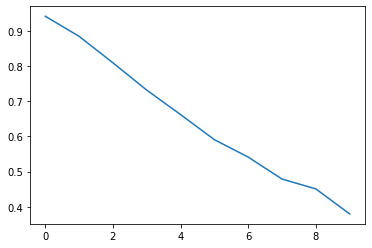

In [ ]:
from matplotlib import pyplot as plt
plt.plot(hist.history['loss'])